In [ ]:
from google.colab import files

In [ ]:
# importing Json File From Local Computer
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"zubairsamo","key":"b8bd24f4cb677fdea691a70b50df5583"}'}

In [ ]:
# Create Directory Name Kaggle 
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Make Directory
! mkdir ~/.kaggle

In [ ]:
# Copy Contents Of json into Directory
! cp kaggle.json ~/.kaggle/


In [ ]:
# Asking Permission For Read And Write
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dataset Url
! kaggle datasets download -d techsash/waste-classification-data

Now Make Directory Name Data and Unzip Images in it


In [ ]:
! mkdir Data

In [ ]:
# After Successfully Downloading Dataset Now Extracting Dataset
! unzip /content/waste-classification-data.zip -d Data

In [ ]:
# Now Importing Main Libraries here
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Activation,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
# Let see What Organi
Organin_img=cv2.imread("/content/Data/DATASET/TRAIN/O/O_10000.jpg")

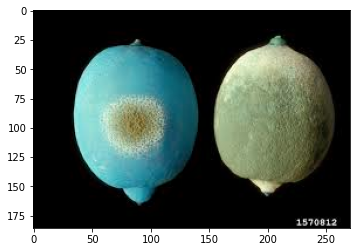

In [ ]:
plt.imshow(Organin_img)

In [ ]:
Organin_img.shape

(186, 271, 3)

In [ ]:
# Converting in RBG Format
Organin_img=cv2.cvtColor(Organin_img,cv2.COLOR_BGR2RGB)

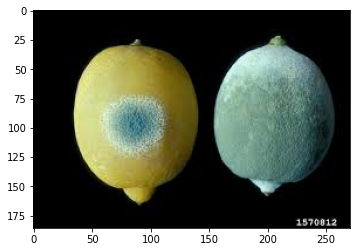

In [ ]:
plt.imshow(Organin_img)

In [ ]:
Recycle_img=cv2.imread("/content/Data/DATASET/TRAIN/R/R_1007.jpg")

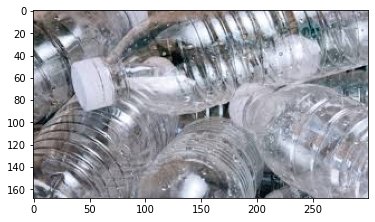

In [ ]:
plt.imshow(Recycle_img)

In [ ]:
Recycle_img=cv2.cvtColor(Recycle_img,cv2.COLOR_BGR2RGB)

In [ ]:
Recycle_img.shape

(168, 300, 3)

In [ ]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Done


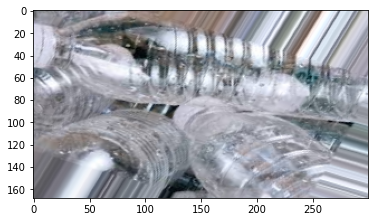

In [ ]:
# Showing Image wheather data augmented not
plt.imshow(image_gen.random_transform(Recycle_img))
print('Done')

In [ ]:
# Give Data to image generator for augmentation
image_gen.flow_from_directory("/content/Data/DATASET/TRAIN")
image_gen.flow_from_directory("/content/Data/DATASET/TEST")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
input_shape=(150,150,3)

In [ ]:
model=Sequential()
# conv Block 1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# conv Block 2
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# conv Block 3
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Dense for Connection
model.add(Dense(256))
model.add(Activation('relu'))

# DropOut Layer for avoiding overfitting

model.add(Dropout(0.5))
# Dense Layer for output
model.add(Dense(1))
# Activation for Output
model.add(Activation('sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Seeing Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
input_shape[:2]

(150, 150)

In [ ]:
batch_size=32

In [ ]:
# Now analyzing Data and Augmented with image data generator
train_gen=image_gen.flow_from_directory('/content/Data/DATASET/TRAIN',
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary')
test_gen=image_gen.flow_from_directory('/content/Data/DATASET/TEST',
                                        target_size=input_shape[:2],
                                        batch_size=batch_size,
                                        class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
train_gen.class_indices

{'O': 0, 'R': 1}

In [ ]:
# Now Fit Model
results=model.fit_generator(train_gen,epochs=5,steps_per_epoch=100,validation_data=test_gen,validation_steps=12)


Epoch 1/5
100/100 [==============================] - 148s 1s/step - loss: 0.4858 - accuracy: 0.7753 - val_loss: 0.4883 - val_accuracy: 0.8177
Epoch 2/5
100/100 [==============================] - 145s 1s/step - loss: 0.4479 - accuracy: 0.8026 - val_loss: 0.3793 - val_accuracy: 0.8646
Epoch 3/5
100/100 [==============================] - 147s 1s/step - loss: 0.4395 - accuracy: 0.8153 - val_loss: 0.3461 - val_accuracy: 0.8776
Epoch 4/5
100/100 [==============================] - 152s 2s/step - loss: 0.4375 - accuracy: 0.8084 - val_loss: 0.3415 - val_accuracy: 0.8724
Epoch 5/5
100/100 [==============================] - 146s 1s/step - loss: 0.4336 - accuracy: 0.8109 - val_loss: 0.3771 - val_accuracy: 0.8359


In [ ]:
type(results)

tensorflow.python.keras.callbacks.History

In [ ]:
print(results.history['accuracy'])

[0.7753124833106995, 0.8026481866836548, 0.8153125047683716, 0.8084375262260437, 0.8109375238418579]


In [ ]:
print(results.history['loss'])

[0.48584774136543274, 0.4478517174720764, 0.4394936263561249, 0.4374956488609314, 0.4335971176624298]


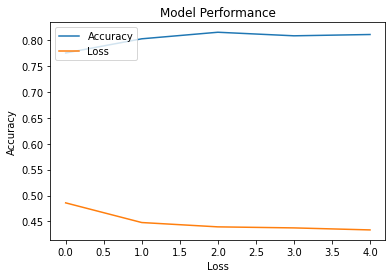

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.legend(['Accuracy','Loss'],loc=('upper left'))
plt.show()

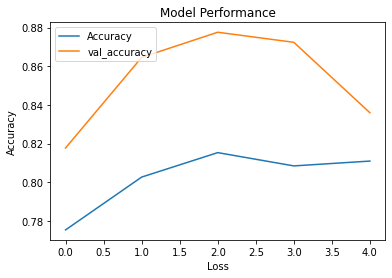

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.legend(['Accuracy','val_accuracy'],loc=('upper left'))
plt.show()

In [ ]:
# Pick Random Image From Train/O Folder 
Organic=image.load_img('/content/Data/DATASET/TRAIN/R/R_1761.jpg',target_size=(150,150,3))
Organic=image.img_to_array(Organic)
print(Organic.shape)
Organic=np.expand_dims(Organic,axis=0)
print(Organic.shape)
Organic=Organic/255

(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
Pred_O=model.predict(Organic)

In [ ]:
# Pick Random Image From Train/R Folder 
Recycle=image.load_img('/content/Data/DATASET/TRAIN/R/R_1524.jpg',target_size=(150,150,3))
Recycle=image.img_to_array(Recycle)
print(Recycle.shape)
Recycle=np.expand_dims(Recycle,axis=0)
print(Recycle.shape)
Recycle=Recycle/255

(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
Pred_R=model.predict(Recycle)

In [ ]:
print(f'chances of Organic Image according to model is:{Pred_O}')
print(f'chances of Recyclable Image according to model is:{Pred_R}')

chances of Organic Image according to model is:[[0.09818253]]
chances of Recyclable Image according to model is:[[0.7623681]]


In [ ]:
result=model.predict_classes(Organic)
print(result)
if result[0][0]==1:
  prediction='Recyclabe Image'
else:
  prediction='Organic Image'

print(prediction)

In [ ]:
result=model.predict_classes(Recycle)
print(result)
if result[0][0]==1:
  prediction='Recyclabe Image'
else:
  prediction='Organic Image'

print(prediction)

[[1]]
Recyclabe Image


In [ ]:
model.save_weights('Waste_Classification.h5')